In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

PCN- max val accuracy: 0.7611111402511597 epoch: 668
BP- max val accuracy: 0.75 ; epoch: 649


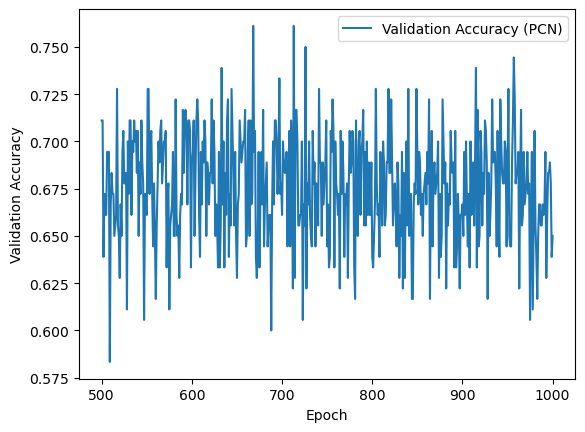

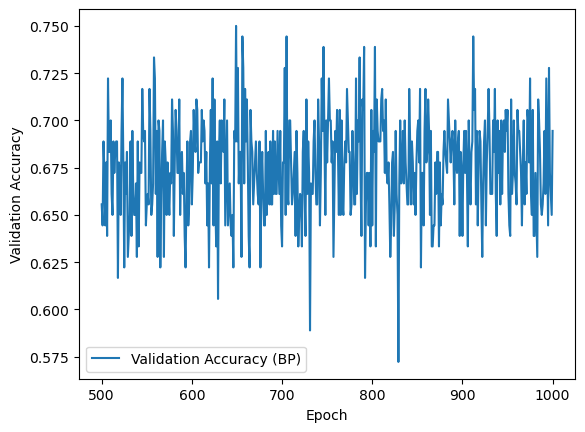

Target Accuracy: 0.75
PCN Model -target accuracy: 0.75 ; epoch: [726]
BP Model - target accuracy: 0.75 ; epoch: [649]


In [52]:
# Load PCN history
with open('/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/all_epochs_history.json', 'r') as file:
    history_pcn = json.load(file)

# Load the backprop-trained ANN history 
with open('/Users/denisekittelmann/Documents/Python/BiMoL/results/bp_ann/epochs_history_comb.json', 'r') as file:
    history_bp = json.load(file)


train_acc_pcn = [epoch['history']['accuracy'][0] for epoch in history_pcn]
train_val_acc_pcn = [epoch['history']['val_accuracy'][0] for epoch in history_pcn]
train_loss_pcn = [epoch['history']['loss'][0] for epoch in history_pcn]
train_val_loss_pcn = [epoch['history']['val_loss'][0] for epoch in history_pcn]

train_acc_bp = [epoch['history']['accuracy'][0] for epoch in history_bp]
train_val_acc_bp = [epoch['history']['val_accuracy'][0] for epoch in history_bp]
train_loss_bp = [epoch['history']['loss'][0] for epoch in history_bp]
train_val_loss_bp = [epoch['history']['val_loss'][0] for epoch in history_bp]

#plt.plot(train_acc_pcn, label='Training Accuracy')
#plt.plot(train_val_acc_pcn , label='Validation Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

#plt.plot(train_loss_pcn, label='Training Loss')
#plt.plot(train_val_loss_pcn, label='Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

#plt.plot(train_acc_bp, label='Training Accuracy')
#plt.plot(train_val_acc_bp, label='Validation Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

#plt.plot(train_loss_bp, label='Training Loss')
#plt.plot(train_val_loss_bp, label='Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

# Extract epoch 5000 from 1000 
val_acc_pcn_epoch_5000 = train_val_acc_pcn[499:1000]
val_acc_bp_epoch_5000 = train_val_acc_bp[499:1000]

# Find max within epoch 500-1000
max_val_acc_pcn = max(val_acc_pcn_epoch_5000) # 668
epoch_max_val_acc_pcn = val_acc_pcn_epoch_5000.index(max_val_acc_pcn) + 500  # to prevent confusions add + 500 to index from 500 to 1000 instead of 0 - 500

max_val_acc_bp = max(val_acc_bp_epoch_5000) # 649
epoch_max_val_acc_bp = val_acc_bp_epoch_5000.index(max_val_acc_bp) + 500  

print("PCN- max val accuracy:", max_val_acc_pcn, "epoch:", epoch_max_val_acc_pcn)
print("BP- max val accuracy:", max_val_acc_bp, "; epoch:", epoch_max_val_acc_bp)


# Visually inspect results 
val_acc_pcn_epoch_5000 = train_val_acc_pcn[499:1000]
val_acc_bp_epoch_5000 = train_val_acc_bp[499:1000]

max_val_acc_pcn_epoch_5000= max(val_acc_pcn_epoch_5000) 
max_val_acc_bp_epoch_5000 = max(val_acc_bp_epoch_5000) 

# Plot validation accuracy PCN 
epochs = list(range(500, 1001))
plt.plot(epochs, val_acc_pcn_epoch_5000, label='Validation Accuracy (PCN)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot validation accuracy backprop-trained ANN 
plt.plot(epochs, val_acc_bp_epoch_5000, label='Validation Accuracy (BP)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


# Find the closest validation accuracy to target accuracy in the PCN & backprop-trained ANN and the corresponding epochs 

target_accuracy = min(max_val_acc_pcn_epoch_5000, max_val_acc_bp_epoch_5000)
print("Target Accuracy:",target_accuracy)

target_val_acc_pcn = min(val_acc_pcn_epoch_5000, key=lambda x: abs(x - target_accuracy))
pcn_epochs = [i + 500 for i, acc in enumerate(val_acc_pcn_epoch_5000) if abs(acc - target_accuracy) == abs(target_val_acc_pcn - target_accuracy)]

target_val_acc_bp = min(val_acc_bp_epoch_5000, key=lambda x: abs(x - target_accuracy))
bp_epochs = [i + 500 for i, acc in enumerate(val_acc_bp_epoch_5000) if abs(acc - target_accuracy) == abs(target_val_acc_bp - target_accuracy)]

print("PCN Model -target accuracy:", target_val_acc_pcn, "; epoch:", pcn_epochs) # 726
print("BP Model - target accuracy:", target_val_acc_bp, "; epoch:", bp_epochs) # 649
